<a href="https://colab.research.google.com/github/IshaSinghVatsa/MACHINE-LEARNING/blob/main/Lab10_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
%matplotlib inline
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/heart.csv')
display(df.head())

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Index(['age', 'sex', 'cp', 'fbs', 'restecg', 'exng', 'caa', 'thall', 'output',
       'slp'],
      dtype='object')

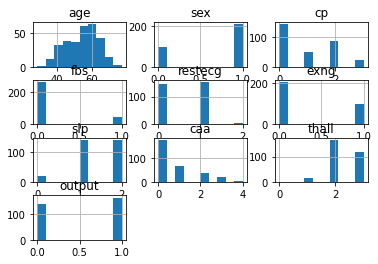

In [ ]:
#Drop the columns with the non numerical values.
df1 = df
num_df =df1.drop(['trtbps', 'chol','oldpeak','thalachh'], axis=1)
num_df.columns
num_df.hist()

# Bring the class attribute as the last column
# The casulaty Severity here has 3 values.. 1.Fatal, 2.Seriuos . 3.Slight

temp_series = num_df.pop('slp')
num_df['slp'] = temp_series
num_df.columns

In [ ]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [ ]:
# importing the sklearn library
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
# getting the x(dataset excluding the class attribute) and y(class attribute) dataset from class data set
x = num_df.drop('slp',axis=1)
y = num_df['slp']

# Get dummy variable 
y = pd.get_dummies(y).values

X_train, X_test, y_train, y_test= train_test_split(x, y, test_size= 0.25)

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(100,),random_state=1, max_iter=300).fit(X_train, y_train)
clf.fit(X_train,y_train)
y_pred = clf.predict_proba(X_train)
print('Accuracy:', roc_auc_score(y_train, clf.predict_proba(X_train),multi_class="ovr"))

Accuracy: 0.7640386120778278


**BACK PROPAGATION**

In [ ]:
# Initialize variables
learning_rate = 0.1
iterations = 500
N = y_train.size

# number of input features
input_size = 9

# number of hidden layers neurons
hidden_size = 2 

# number of neurons at the output layer
output_size = 3  

results = pd.DataFrame(columns=["mse", "accuracy"])

In [ ]:
# Initialize weights
np.random.seed(10)

# initializing weight for the hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   

# initializing weight for the output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size)) 

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)
    
def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

In [ ]:
for itr in range(iterations):    
    
    # feedforward propagation
    # on hidden layer
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)

    # on output layer
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)
    
    
    # Calculating error
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)
    results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
    
    # backpropagation
    E1 = A2 - y_train
    dW1 = E1 * A2 * (1 - A2)

    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)

    
    # weight updates
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_train.T, dW2) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

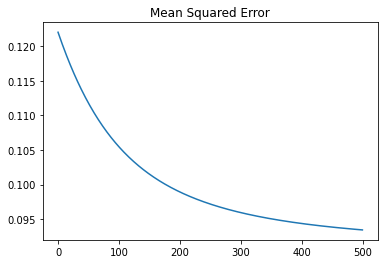

In [ ]:
results.mse.plot(title="Mean Squared Error")

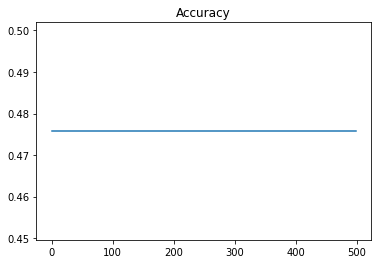

In [ ]:
results.accuracy.plot(title="Accuracy")

In [ ]:
y_pred = clf.predict_proba(X_train)
print('Accuracy:', roc_auc_score(y_train,y_pred,multi_class="ovr"))

Accuracy: 0.7640386120778278
